# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 11 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 11, is characterized by a different temperature or a limited set of temperatures (if you need more than 11 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

Si è scelto di eseguire la consegna 1.

### Exercise 10.2

Apply your parallel code to the TSP problem for 110 italian "capoluoghi di provincia" longitude and latitude coordinates in the *cap_prov_ita.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

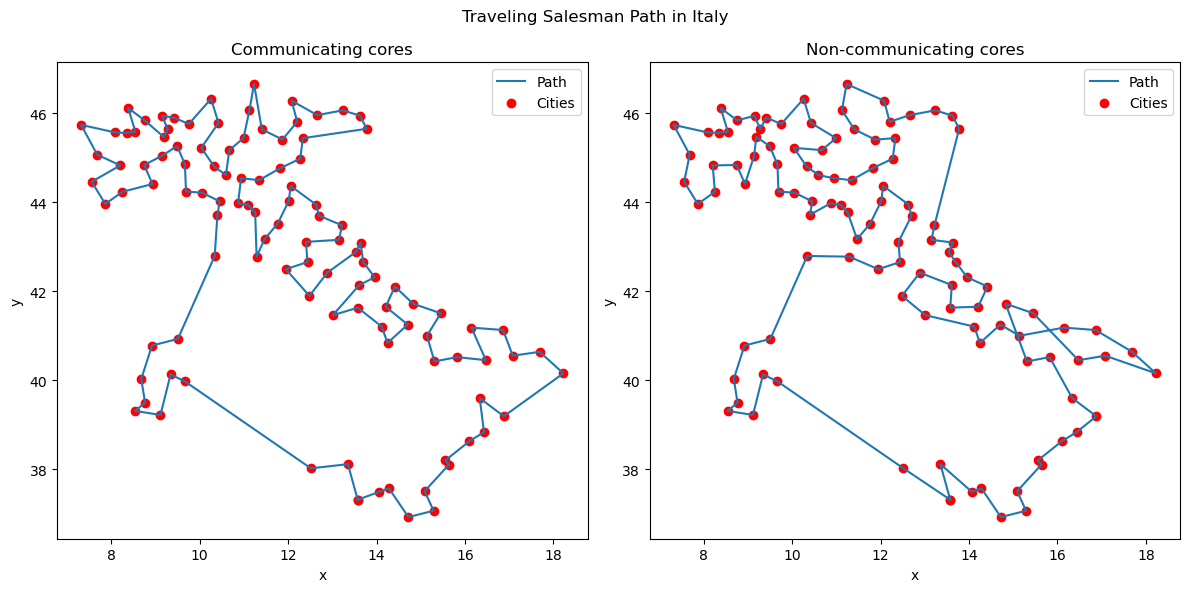

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
data = np.loadtxt('italy_path.txt')
x = data[:,0]
y = data[:,1]
plt.plot(x, y, label='Path')
plt.scatter(x, y, c='red', label='Cities')  
plt.title('Communicating cores')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
data = np.loadtxt('italy_path_nc.txt')
x = data[:,0]
y = data[:,1]
plt.plot(x, y, label='Path')
plt.scatter(x, y, c='red', label='Cities')  
plt.title('Non-communicating cores')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.suptitle("Traveling Salesman Path in Italy")
plt.tight_layout() 
plt.show()

Si verifica che nel caso non comunicante (grafico di destra) sono presenti degli incroci (per la precisione, 2) mentre, nel caso comunicante (grafico di sinistra) non se ne vedono: ciò lascia presagire che il caso con cores comunicanti abbia raggiunto un risultato migliore (si veda sotto per maggiori dettagli).

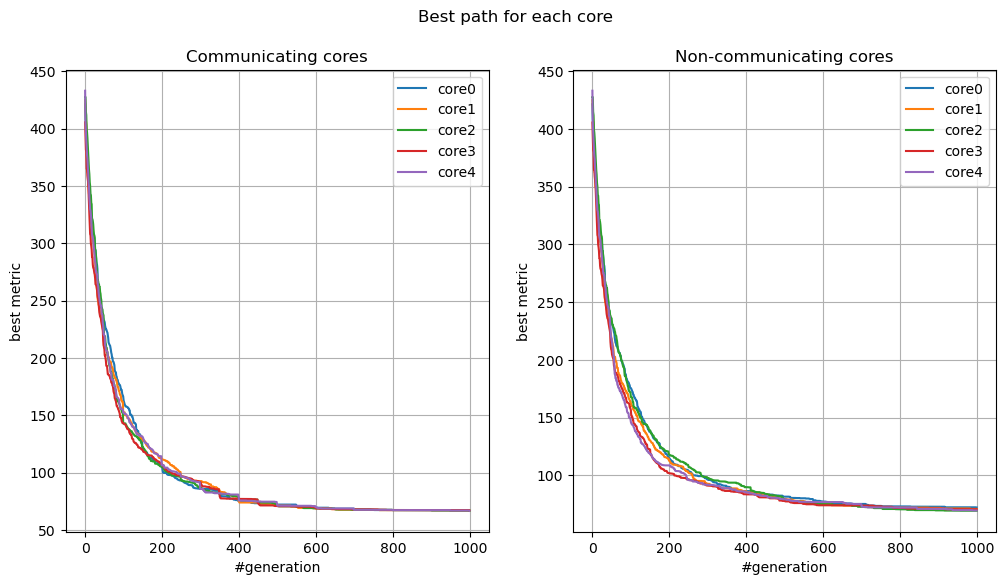

LUNGHEZZA DEL PERCORSO MIGLIORE PER OGNI CORE:

 CORES COMUNICANTI:

core0:	67.0427

core1:	67.0427

core2:	66.8529

core3:	67.0568

core4:	66.8529

CORES NON COMUNICANTI:

core0:	72.1568

core1:	70.885

core2:	69.3394

core3:	70.5717

core4:	69.5952



In [2]:
plt.figure(figsize=(12, 6))

Ncores = [0,1,2,3,4]

plt.subplot(1, 2, 1)
data = {}

for i in Ncores:
    data_name = np.genfromtxt('core' + str(i) + '_best_metric.txt')
    x = data_name[:, 0]
    y = data_name[:, 1]
    
    data[i] = (x, y)
    plt.plot(x, y, label="core" + str(i))

plt.title('Communicating cores')
plt.xlabel('#generation')
plt.ylabel('best metric')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
data = {}

for i in Ncores:
    data_name = np.genfromtxt('core' + str(i) + '_best_metric_nc.txt')
    x = data_name[:, 0]
    y = data_name[:, 1]
    
    data[i] = (x, y)
    plt.plot(x, y, label="core" + str(i))

plt.title('Non-communicating cores')
plt.xlabel('#generation')
plt.ylabel('best metric')
plt.grid(True)
plt.legend()

plt.suptitle('Best path for each core')
plt.show()

print ("LUNGHEZZA DEL PERCORSO MIGLIORE PER OGNI CORE:\n\n CORES COMUNICANTI:\n")
for i in Ncores:
    data_name = np.genfromtxt('core' + str(i) + '_best_metric.txt')
    y = data_name[:, 1]
    print("core" + str(i) + ":\t" + str(y[-1]) + "\n")
    
    
print ("CORES NON COMUNICANTI:\n")
for i in Ncores:
    data_name = np.genfromtxt('core' + str(i) + '_best_metric_nc.txt')
    y = data_name[:, 1]
    print("core" + str(i) + ":\t" + str(y[-1]) + "\n")


N.B. Sono stati utilizzati solo 5 cores perchè queste simulazioni sono state eseguite lavorando da remoto sulle macchine del laboratorio in cui, in tutte le volte in cui si è tentato di eseguire la simulazione, erano disponibili al più 5 cores.

Le due simulazioni (cores comunicanti e non comunicanti) sono state eseguite nelle medesime condizioni (nel secondo caso, sono state semplicemente commentate le righe di codice riguardanti la comunicazione tra cores).

Si evince che, come atteso, il caso a cores comunicanti restituisce risultati migliori.
Il grafico "Best path for each core - Communicating cores" presenta dei gradini: questi rendono conto degli scambi.
Inoltre, si verifica che nel caso a cores comunicanti, i risultati finali restituiti dai vari cores sono molto simili tra loro (ciò è ovvio ed è una naturale conseguenza dello scambio); mentre, nel caso non comunicante, la dispersione dei risultati finali è molto maggiore: questa cosa indica che, se si esegue il problema a cores non comunicanti, il risultato è enormemente dipendente dal particolare cores utilizzato e, quindi, dai parametri del generatore di numeri casuali (nella fattispece, i Primes). 

La comunicazione bidirezionale tra i cores è avvenuta nella maniera seguente:
    utilizzando i metodi MPI_Send ed MPI_Recv ("comunicazione bloccante") per i due cores interessati (poniamo 1 e 2), sono stati invocati prima Send e Recv (in quest'ordine) per il cores 1 e, immediatamente dopo, Recv e Send (in quest'ordine) per il core 2: questo modo di procedere consente di evitare punti morti ("dead-locks").